# IPL Match Analysis and Prediction

In [1]:
## import the liabraries

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load the dataset

match_df = pd.read_csv('matches.csv')
match_df.head(10)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [4]:
match_df.shape

(756, 18)

In [7]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


# Exploratory Data Analysis 

In [9]:
match_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [10]:
match_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [11]:
##Checking for missing values
match_df[match_df['winner'].isnull() == True]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [12]:
##Replace null results
match_df['winner'].fillna('Draw', inplace=True)

In [13]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             756 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [14]:
team_encodings = {

'Mumbai Indians' : 1, 
'Kings XI Punjab': 2,                 
'Chennai Super Kings': 3,  
'Royal Challengers Bangalore': 4, 
'Kolkata Knight Riders' : 5,
'Delhi Daredevils' : 6,               
'Delhi Capitals' : 6,
'Rajasthan Royals' : 7,               
'Sunrisers Hyderabad' : 8,            
'Deccan Chargers' : 9,                
'Pune Warriors' : 10,                   
'Gujarat Lions' : 11,                 
'Rising Pune Supergiant' : 12,          
'Rising Pune Supergiants' : 12,         
'Kochi Tuskers Kerala' : 13,
'Draw' : 14   
}

team_encode_dict = {
    'team1' : team_encodings,
    'team2' : team_encodings,
    'toss_winner' : team_encodings,
    'winner' : team_encodings,
}

match_df.replace(team_encode_dict, inplace = True)
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,8,4,4,field,normal,0,8,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,12,12,field,normal,0,12,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,11,5,5,field,normal,0,5,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,12,2,2,field,normal,0,2,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,4,6,4,bat,normal,0,4,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [15]:
##  Missing Value in city col
match_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Abu Dhabi           7
Ranchi              7
Cape Town           7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [16]:
match_df[match_df['city'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,4,4,field,normal,0,4,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,5,6,5,bat,normal,0,6,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,3,7,7,field,normal,0,3,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,8,6,8,bat,normal,0,8,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,3,1,bat,normal,0,3,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,4,2,2,field,normal,0,2,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,8,1,1,field,normal,0,8,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [17]:
match_df['city'].fillna('Dubai', inplace=True)
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               756 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             756 non-null int64
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(6), object(12)
memory usage: 106.4+ KB


In [18]:
match_df.describe()

,id,season,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,4.838624,13.283069,3.350529
std,3464.478148,3.366895,0.156630,2.938737,23.471144,3.387963
min,1.000000,2008.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,7.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,14.000000,146.000000,10.000000


# Toss wins and match wins by each team 

In [19]:
toss_wins = match_df['toss_winner'].value_counts(sort=True)
match_wins = match_df['winner'].value_counts(sort=True)

for idx, val in match_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx - 1]} -> {toss_wins[idx]}")

Mumbai Indians -> 98
Chennai Super Kings -> 89
Kolkata Knight Riders -> 92
Royal Challengers Bangalore -> 81
Kings XI Punjab -> 81
Delhi Daredevils -> 90
Delhi Capitals -> 80
Rajasthan Royals -> 46
Sunrisers Hyderabad -> 43
Gujarat Lions -> 13
Pune Warriors -> 15
Deccan Chargers -> 20
Rising Pune Supergiant -> 8


KeyError: 14

<AxesSubplot:>

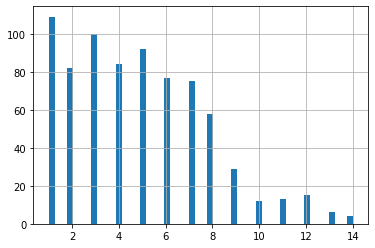

In [20]:
match_df['winner'].hist(bins=50)

Text(0.5, 1.0, 'Match winners')

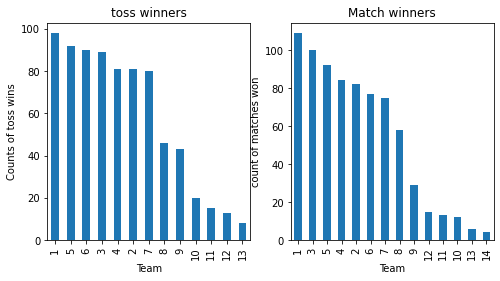

In [21]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Counts of toss wins')
ax1.set_title("toss winners")
toss_wins.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [22]:
match_df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Droping the redundant columns

In [23]:
match_df = match_df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
match_df.head

<bound method NDFrame.head of     team1 team2           city toss_decision toss_winner  \
0       8     4      Hyderabad         field           4   
1       1    12           Pune         field          12   
2      11     5         Rajkot         field           5   
3      12     2         Indore         field           2   
4       4     6      Bangalore           bat           4   
5      11     8      Hyderabad         field           8   
6       5     1         Mumbai         field           1   
7       4     2         Indore           bat           4   
8       6    12           Pune         field          12   
9       8     1         Mumbai         field           1   
10      2     5        Kolkata         field           5   
11      4     1      Bangalore         field           1   
12     12    11         Rajkot         field          11   
13      5     8        Kolkata         field           8   
14      6     2          Delhi           bat           6   
15     11 

In [24]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city','toss_decision','venue']
encoder = LabelEncoder()
for ftr in ftr_list:
    match_df[ftr] = encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)
    
match_df    

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mohali' 'Mumbai'
 'Nagpur' 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['ACA-VDCA Stadium' 'Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Feroz Shah Kotla Ground' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New 

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,8,4,15,1,4,28,8
1,1,12,27,1,12,21,12
2,11,5,29,1,5,31,5
3,12,2,16,1,2,13,2
4,4,6,2,0,4,17,4
5,11,8,15,1,8,28,8
6,5,1,24,1,1,40,1
7,4,2,16,0,4,13,2
8,6,12,27,1,12,21,6
9,8,1,24,1,1,40,1


## Machine Learning

In [25]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(match_df, test_size=0.2, random_state=5)
print(train_df.shape)
print(test_df.shape)

(604, 7)
(152, 7)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def print_model_scores(model, data, predictor, target):
    model.fit(data[predictor], data[target])
    predictions = model.predict(data[predictor])
    accuracy = accuracy_score(predictions, data[target])
    print('Accuracy: %s' % '0:.2'.format(accuracy))
    scores = cross_val_score(model, data[predictor], data[target],
                             scoring="neg_mean_squared_error", cv=5)
    
    print('Cross-Validation Scores: {}'.format(np.sqrt(-scores)))
    print(f'Average RMSE: {np.sqrt(-scores).mean()}')
    

In [27]:
##logistic regression

target_var = ["winner"]
predictor_var = ['team1', 'team2', 'venue', 'toss_winner', 'city', 'toss_decision']
model = LogisticRegression()

print_model_scores(model, train_df, predictor_var, target_var)


Accuracy: 0:.2
Cross-Validation Scores: [2.8123106  2.71664596 2.69526674 2.97093357 2.98049213]
Average RMSE: 2.8351298009493844


In [28]:
##Random Forest Classifier

model = RandomForestClassifier(n_estimators=100)
print_model_scores(model, train_df, predictor_var, target_var)

Accuracy: 0:.2
Cross-Validation Scores: [3.4220964  2.63793057 2.89770499 3.14787085 3.02765035]
Average RMSE: 3.0266506343451574


In [29]:
team1 = 'Mumbai Indians'
team2 = 'Sunrisers Hyderabad'
toss_winner = 'Sunrisers Hyderabad'
inp = [team_encode_dict['team1'][team1],team_encode_dict['team2'][team2],'14',team_encode_dict['toss_winner'][toss_winner],'2','1']
print(inp)
inp = np.array(inp).reshape((1,-1))
print(inp)
output=model.predict(inp)
print(output)
print(f"The winner would be: {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(output)]}")

[1, 8, '14', 8, '2', '1']
[['1' '8' '14' '8' '2' '1']]
[1]
The winner would be: Mumbai Indians


In [30]:
pd.Series(index=predictor_var,data=model.feature_importances_)

team1            0.219631
team2            0.247888
venue            0.181560
toss_winner      0.163278
city             0.156425
toss_decision    0.031219
dtype: float64